In [2]:
#### Analysis beer competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare

### Random data 
##### (here you should load the data of Joao)

In [142]:
### Random data

# N = 30

# a = np.random.randint(2, size=N*10)
# b = np.random.randint(2, size=N*10)

# df = pd.DataFrame({'blind':a, 'seen':b})

# subjects = ['alba', 'delfi', 'anna', 'sandra', 'david', 'mariona', 'rosa', 'joao', 'genis', 'albert', 
#             'pedro', 'pili', 'alba', 'gerard', 'alegria', 'montse', 'josep', 'joaquin', 'pepe', 'isi',
#            'laura', 'marc', 'mire', 'sonia', 'ana', 'maria', 'eva', 'monica', 'camila', 'uri']

# b1 = ['heineken', 'heineken', 'heineken', 'heineken', 'damm', 'damm',   'damm',  'galicia',  'galicia',  'cruzcampo']
# b2 = ['china',    'cruzcampo', 'galicia',    'damm',   'china', 'cruzcampo', 'galicia', 'china', 'cruzcampo', 'china']

# subj_st = []
# #comb = []
# b1s = []
# b2s = []


# for s in subjects:
#     subj_st.append([ s for x in range(0,10)])
#     #comb.append([ str(i) for i in range(1,11)])    
#     b1s.append(b1)
#     b2s.append(b2)

# df['subj'] = list(itertools.chain.from_iterable(subj_st))
# #df['comb'] = list(itertools.chain.from_iterable(comb))
# df['beer1'] = list(itertools.chain.from_iterable(b1s))
# df['beer2'] = list(itertools.chain.from_iterable(b2s))

# df.head(20)

In [143]:
import os
os.getcwd()

df=pd.read_excel('results.xlsx')

# Stats

## 1 Question: Are we consistent blind - seen?
#### (subjet and group level)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


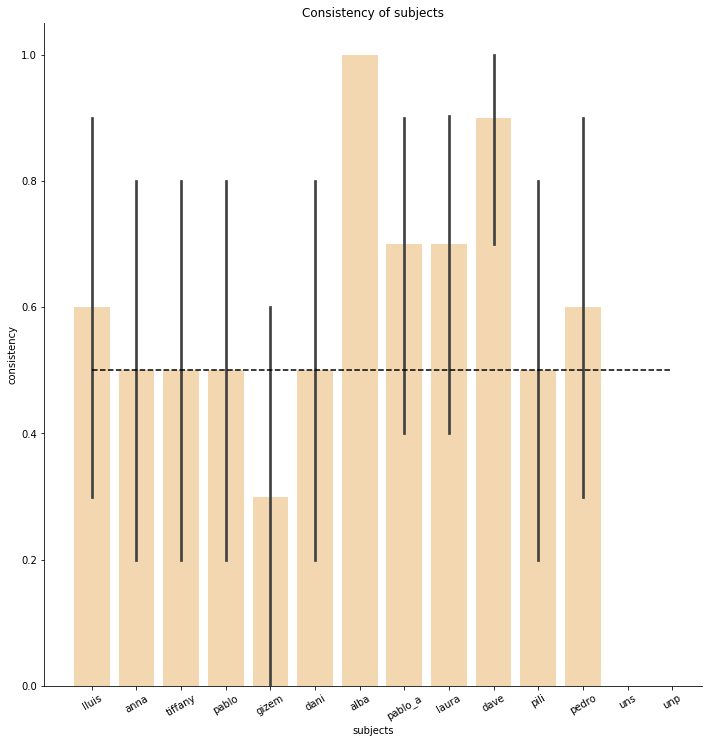

lluis, consistency p_val = 0.754
anna, consistency p_val = 1.0
tiffany, consistency p_val = 1.0
pablo, consistency p_val = 1.0
gizem, consistency p_val = 0.344
dani, consistency p_val = 1.0
alba, consistency p_val = 0.002
pablo_a, consistency p_val = 0.344
laura, consistency p_val = 0.344
dave, consistency p_val = 0.021
pili, consistency p_val = 1.0
pedro, consistency p_val = 0.754
uns, consistency p_val = 0.002
unp, consistency p_val = 0.002


In [144]:
##
# column of consistency (1: you are consistent, 0: inconsistent)
## 0.5 is chance level


df['int'] = 1
df['consistency'] =1-  abs( df['blind'] - df['seen'] )

## Subjcet consistency.
g= sns.factorplot(x='subj', y='consistency', kind='bar', data=df, color='#fed9a6', size=10)
g.set_xticklabels(rotation=30)
plt.title('Consistency of subjects')
plt.xlabel('subjects')
plt.plot([0, len(df.subj.unique())-1], [0.5, 0.5], 'k--')
plt.show(block=False)


## Each subject
for subj in df.subj.unique():
    df_s = df.loc[df['subj'] == subj]
    times_consistent = df_s.loc[df.consistency == 1, 'consistency'].count()
    p_val = stats.binom_test(times_consistent, n=len(df_s), p=0.5, alternative='two-sided')
    print( subj + ', consistency p_val = ' + str(round(p_val, 3)))


In [145]:
df

,blind,seen,beer1,beer2,subj,int,consistency
0,1,0.0,heineken,heineken_0,lluis,1,0.0
1,1,1.0,heineken,damm,lluis,1,1.0
2,0,1.0,heineken,galicia,lluis,1,0.0
3,0,0.0,heineken,cruzcampo,lluis,1,1.0
4,1,1.0,heineken_0,damm,lluis,1,1.0
5,0,1.0,heineken_0,galicia,lluis,1,0.0
6,0,0.0,heineken_0,cruzcampo,lluis,1,1.0
7,0,1.0,damm,galicia,lluis,1,0.0
8,0,0.0,damm,cruzcampo,lluis,1,1.0
9,0,0.0,galicia,cruzcampo,lluis,1,1.0


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


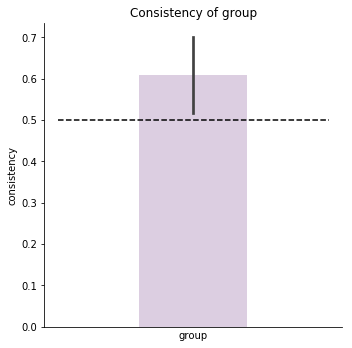

Group consistency p_val = 0.022
N = 12


In [146]:
## Population consistency
## Subjcet consistency.
sns.factorplot(x='int', y='consistency', kind='bar', data=df, color= '#decbe4')
plt.plot([-1, 1], [0.5, 0.5], 'k--')
plt.tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 
plt.xlabel('group')
plt.title('Consistency of group')
plt.show(block=False)

#As a group
times_consistent = df.loc[df.consistency == 1, 'consistency'].count()
p_val = stats.binom_test(times_consistent, n=len(df) - 2*10, p=0.5, alternative='two-sided')

print( 'Group consistency p_val = ' + str(round(p_val, 3)))
###
print('N = ' + str(len(df.subj.unique() ) -2 ) )
#print( 'No one is performing above chance')

## 2. Are all beers the same?


In [147]:
df.subj.unique().shape

(14,)

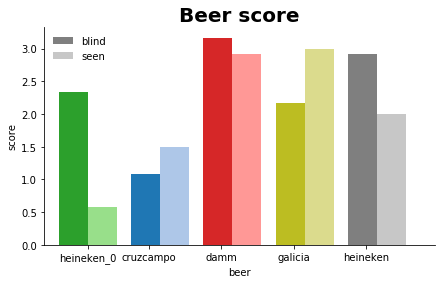

Objective Difference between beers p_val = 0.009
Subjective Difference between beers p_val = 0.0


,beer,counts_b,counts_s
4,cruzcampo,13,18
1,damm,38,35
3,galicia,26,36
2,heineken,35,24
0,heineken_0,28,7


In [148]:
############
############## rank of beers by number of winning situations
############
order_list = [ 'heineken_0', 'cruzcampo',  'damm',  'galicia', 'heineken' ]


blind_win=[]
seen_win=[]

for i in range(0, len(df)):
    ### blind
    res = df['blind'].iloc[i]
    if res == 0:
        blind_win.append(  df['beer1'].iloc[i]  )
    elif res==1:
        blind_win.append(  df['beer2'].iloc[i]  )
    
    ### seen
    res_s = df['seen'].iloc[i]
    if res_s == 0:
        seen_win.append(  df['beer1'].iloc[i]  )
    elif res_s ==1:
        seen_win.append(  df['beer2'].iloc[i]  )
    else:
        seen_win.append(np.nan)
    



df['blind_win'] = blind_win
df['seen_win'] = seen_win 


beers=[]
counts_b=[]
counts_s=[]
for beer in df['blind_win'].unique():
    beers.append(beer)
    counts_b.append( df.loc[df.blind_win == beer, 'blind_win'].count())
    counts_s.append( df.loc[df.seen_win == beer, 'seen_win'].count())


##   
df_b = pd.DataFrame({ 'beer':beers, 'counts': counts_b}) 
df_b['condition'] = 'blind'
#
df_s = pd.DataFrame({ 'beer':beers, 'counts': counts_s}) 
df_s['condition'] = 'seen'

df_bs = pd.DataFrame({ 'beer':beers, 'counts_b': counts_b, 'counts_s': counts_s}) 

# df_b_s = pd.concat([df_b, df_s])
# sns.factorplot(x='beer', y='counts', hue='condition', kind='bar', hue_order = ['blind', 'seen'], order=order_list, data=df_b_s)
# plt.title('Beer score')
# plt.show(block=False)

#####

width=0.4

df_b['indx_plot']=df_b['beer'].copy()
df_b['indx_plot'] = df_b['indx_plot'].replace(order_list, [0, 1, 2, 3, 4])

df_s['indx_plot']=df_s['beer'].copy()
df_s['indx_plot'] = df_s['indx_plot'].replace(order_list, [0 + width, 1 + width, 2+ width, 3+ width, 4+ width])


Colors = ['#1f77b4', '#aec7e8', '#d62728', '#ff9896', '#bcbd22', '#dbdb8d', '#7f7f7f', '#c7c7c7', '#2ca02c', '#98df8a']

df_merge=pd.concat([df_b, df_s])
df_merge = df_merge.sort_values('beer')

fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
plt.bar(df_merge['indx_plot'],df_merge['counts']/12, color=Colors , width=width)
plt.xticks( [width/2, 1.25-width/2, 2.25-width/2, 3.25-width/2, 4.25-width/2], order_list)
ax.set_title('Beer score', fontsize=20, weight='demibold')
#plt.title('Beer score')
plt.xlabel('beer')
plt.ylabel('score')
plt.xlim(-width, 5)
#plt.ylim(0, 80)
plt.bar(10,1, color='#7f7f7f', label='blind')
plt.bar(10,1, color= '#c7c7c7', label='seen')
plt.legend(frameon=False)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



## Calculate all together with a Chi Square
## If they are all the same, they should win 20% of the times each.

f_obs = list(df_bs.counts_b)
f_exp = [0.2*len(df) for i in range(0,5)]

p_val = chisquare(f_obs, f_exp)[1]
print( 'Objective Difference between beers p_val = ' + str(round(p_val, 3)))

f_obs = list(df_bs.counts_s)
f_exp = [0.2*len(df) for i in range(0,5)]

p_val = chisquare(f_obs, f_exp)[1]
print( 'Subjective Difference between beers p_val = ' + str(round(p_val, 3)))

df_bs.sort_values('beer')


In [149]:
order_list

['heineken_0', 'cruzcampo', 'damm', 'galicia', 'heineken']

In [150]:


beers=[]
counts = []
subjects=[]
condition=[]


for s in ['lluis', 'anna', 'tiffany', 'pablo', 'gizem', 'dani', 'alba',  'pablo_a', 'laura', 'dave', 'pili', 'pedro']:
        df_s = df.loc[df['subj']==s ]
        blind_win = []
        seen_win = []
        for i in range(0, len(df_s)):
            ### blind
            res = df_s['blind'].iloc[i]
            if res == 0:
                blind_win.append(  df_s['beer1'].iloc[i]  )
            elif res==1:
                blind_win.append(  df_s['beer2'].iloc[i]  )

            ### seen
            res_s = df_s['seen'].iloc[i]
            if res_s == 0:
                seen_win.append(  df_s['beer1'].iloc[i]  )
            elif res_s ==1:
                seen_win.append(  df_s['beer2'].iloc[i]  )
            else:
                seen_win.append(np.nan)
            
        ####
        for beer in order_list:
            #blind
            beers.append(beer)
            counts.append( sum( np.array(blind_win) == beer))
            subjects.append(s)
            condition.append('blind')
            #seen
            beers.append(beer)
            counts.append( sum( np.array(seen_win) == beer))
            subjects.append(s)
            condition.append('seen')



df_count_subj=pd.DataFrame({'beer':beers, 'counts':counts, 'subj':subjects, 'cond':condition })
df_count_subj.head(10)



,beer,cond,counts,subj
0,heineken_0,blind,3,lluis
1,heineken_0,seen,1,lluis
2,cruzcampo,blind,0,lluis
3,cruzcampo,seen,0,lluis
4,damm,blind,4,lluis
5,damm,seen,3,lluis
6,galicia,blind,1,lluis
7,galicia,seen,4,lluis
8,heineken,blind,2,lluis
9,heineken,seen,2,lluis


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NormaltestResult(statistic=0.12378618189299682, pvalue=0.9399833741523267)

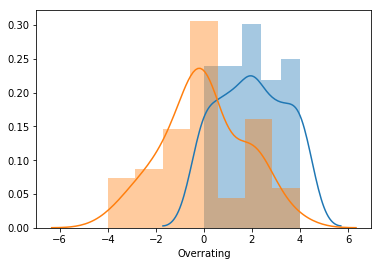

In [186]:
sns.distplot(df_count_subj['counts'])
stats.normaltest(df_count_subj['counts'])



In [151]:
df_count_subj.loc[df_count_subj['cond']=='blind'] - df_count_subj.loc[df_count_subj['cond']=='seen']

df_diff = df_count_subj.loc[df_count_subj['cond']=='blind'].copy()

values_diff = df_count_subj.loc[df_count_subj['cond']=='blind']['counts'].values- df_count_subj.loc[df_count_subj['cond']=='seen']['counts'].values

df_diff['cond']='diff'
df_diff['counts']=values_diff
df_diff


,beer,cond,counts,subj
0,heineken_0,diff,2,lluis
2,cruzcampo,diff,0,lluis
4,damm,diff,1,lluis
6,galicia,diff,-3,lluis
8,heineken,diff,0,lluis
10,heineken_0,diff,3,anna
12,cruzcampo,diff,-2,anna
14,damm,diff,1,anna
16,galicia,diff,-2,anna
18,heineken,diff,0,anna


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update yo

Text(0.5, 1.0, 'Beer score')

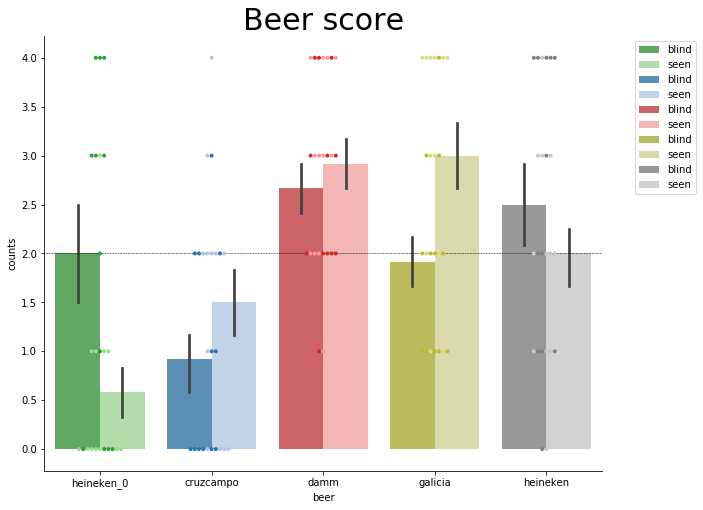

In [178]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10,8))
sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='heineken_0'], kind='bar', ci=68,
               palette= ['#2ca02c', '#98df8a' ], order=order_list, hue_order=['blind', 'seen'],  alpha=0.8)
plt.close()

sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='cruzcampo'], kind='bar', ci=68,
               palette= ['#1f77b4', '#aec7e8'], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)

plt.close()
sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='damm'], kind='bar', ci=68,
               palette= [ '#d62728', '#ff9896'], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)

plt.close()
sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='galicia'], kind='bar', ci=68,
               palette= ['#bcbd22', '#dbdb8d'], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)
plt.close()
sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='heineken'], kind='bar', ci=68,
               palette= ['#7f7f7f', '#c7c7c7' ], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)

plt.close()

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='heineken_0'],
               palette= ['#2ca02c', '#98df8a' ], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='cruzcampo'],
             palette= ['#1f77b4', '#aec7e8'], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='damm'],
               palette= [ '#d62728', '#ff9896'], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='galicia'],
              palette= ['#bcbd22', '#dbdb8d'], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='heineken'],
              palette= ['#7f7f7f', '#c7c7c7' ], order=order_list, hue_order=['blind', 'seen'], size=4)



handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[10:], labels[10:], bbox_to_anchor=(1.05, 1), loc=2)

plt.plot([-0.8, 5.8], [2, 2], 'k--', linewidth=0.5)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=None)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.title('Beer score', size=30)





In [ ]:
### Binomial test!

##Option 1
## Is Heineken better than the others?
## I have 5 beers. If all are equally good, they should win 20% of the times each. By chance --> p=0.20
## 30 people --> 300 tests 
#print(stats.binom_test(58, n=300, p=0.20, alternative='two-sided'))

##Option 2
## Is Heineken better than the others?
## I have 5 beers. Heineken participated in 4*N = 4*30 subj = 120 tests 1vs 1.
## If heinezen is better, p>0.5 --> p=0.5
#print(stats.binom_test(58, n=120, p=0.5, alternative='two-sided'))

####

for beer in df_bs.beer.unique():
    p_val = stats.binom_test( df_bs.loc[df_bs['beer']==beer, 'counts_b']  , n=len(df), p=0.20, alternative='two-sided')
    print( beer + ', blind p_val = ' + str(round(p_val, 3)))

#
print('')
print('')
print( 'Cruzcampo is objectively worse than the others, Damm is objectively better')


In [188]:
from scipy import stats

for beer in df_count_subj.beer.unique():
    p_blind = df_count_subj.loc[(df_count_subj['beer']==beer) & (df_count_subj['cond']=='blind') , 'counts'].values
    t, p_val = stats.ttest_1samp(p_blind, 2)
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))
    
##
print('')
print( 'Damm is objectively better')
print( 'Cruzcampo is objectively worse')
print('')
print('')


for beer in df_count_subj.beer.unique():
    p_seen = df_count_subj.loc[(df_count_subj['beer']==beer) & (df_count_subj['cond']=='seen') , 'counts'].values
    t, p_val = stats.ttest_1samp(p_seen, 2)
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))
    
##
print('')
print( 'Heineken 0  is subjectively worse')
print( 'Damm  is subjectively better')
print( 'Galicia  is subjectively better')



heineken_0, seen p_val = 1.0
cruzcampo, seen p_val = 0.005
damm, seen p_val = 0.039
galicia, seen p_val = 0.777
heineken, seen p_val = 0.275

Damm is objectively better
Cruzcampo is objectively worse


heineken_0, seen p_val = 0.0
cruzcampo, seen p_val = 0.214
damm, seen p_val = 0.009
galicia, seen p_val = 0.015
heineken, seen p_val = 1.0

Heineken 0  is subjectively worse
Damm  is subjectively better
Galicia  is subjectively better


In [153]:

df_diff = df_count_subj.loc[df_count_subj['cond']=='blind', ['cond', 'subj', 'beer']].copy()
values_diff = df_count_subj.loc[df_count_subj['cond']=='seen']['counts'].values- df_count_subj.loc[df_count_subj['cond']=='blind']['counts'].values
df_diff['cond']='diff'
df_diff['Overrating']=values_diff



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NormaltestResult(statistic=0.12378618189299682, pvalue=0.9399833741523267)

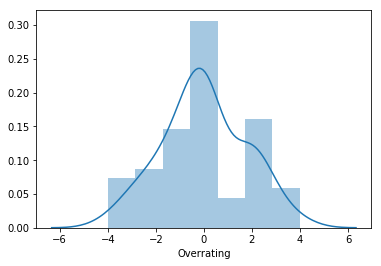

In [187]:
sns.distplot(df_diff['Overrating'])
stats.normaltest(df_diff['Overrating'])

#I can use parametric analysis for the overrating

In [155]:
p_blind = df_diff.loc[df_diff['beer']==beer, 'Overrating'].values
t, p_val = stats.ttest_1samp(list(p_blind), 0)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


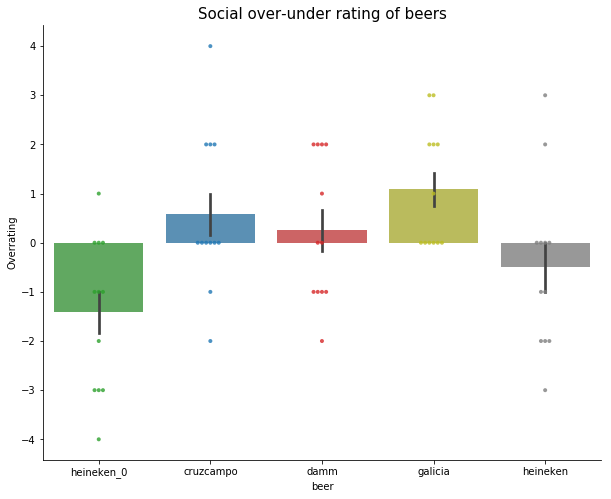

heineken_0, seen p_val = 0.009
cruzcampo, seen p_val = 0.239
damm, seen p_val = 0.571
galicia, seen p_val = 0.012
heineken, seen p_val = 0.339


Heineken 0 is under rated
Estrella Galicia is over rated


In [156]:

fig, ax = pyplot.subplots(figsize=(10,8))

sns.factorplot(ax=ax, x='beer', y='Overrating', data=df_diff, kind='bar', order=order_list, ci=68, 
               palette=['#2ca02c', '#1f77b4', '#d62728', '#bcbd22',  '#7f7f7f'],  alpha=0.8)
plt.close()

sns.swarmplot(ax=ax, x='beer', y='Overrating', data=df_diff, order=order_list, 
               palette=['#2ca02c', '#1f77b4', '#d62728', '#bcbd22',  '#7f7f7f'], alpha=0.8, size=4)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.title('Social over-under rating of beers', size=15)
plt.show()


### It is the way to compare with itself
#### Blind / N is the expected p
#### Seen is the expected 
from scipy import stats

for beer in df_diff.beer.unique():
    p_blind = df_diff.loc[df_diff['beer']==beer, 'Overrating'].values
    t, p_val = stats.ttest_1samp(p_blind, 0)
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))
    
##
print('')
print('')
print( 'Heineken 0 is under rated')
print( 'Estrella Galicia is over rated')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update yo

Text(0.5, 1.0, 'Beer score')

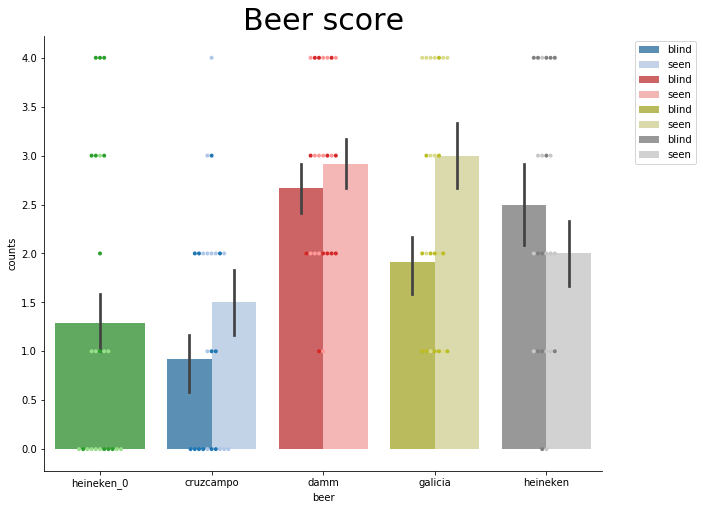

In [157]:

fig, ax = pyplot.subplots(figsize=(10,8))
sns.factorplot(ax=ax, x='beer', y='counts', data=df_count_subj.loc[df_count_subj['beer']=='heineken_0'], kind='bar', ci=68,
               palette= ['#2ca02c', '#98df8a' ], order=order_list,   alpha=0.8)
plt.close()

sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='cruzcampo'], kind='bar', ci=68,
               palette= ['#1f77b4', '#aec7e8'], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)

plt.close()
sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='damm'], kind='bar', ci=68,
               palette= [ '#d62728', '#ff9896'], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)

plt.close()
sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='galicia'], kind='bar', ci=68,
               palette= ['#bcbd22', '#dbdb8d'], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)
plt.close()
sns.factorplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='heineken'], kind='bar', ci=68,
               palette= ['#7f7f7f', '#c7c7c7' ], order=order_list, hue_order=['blind', 'seen'], alpha=0.8)

plt.close()

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='heineken_0'],
               palette= ['#2ca02c', '#98df8a' ], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='cruzcampo'],
             palette= ['#1f77b4', '#aec7e8'], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='damm'],
               palette= [ '#d62728', '#ff9896'], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='galicia'],
              palette= ['#bcbd22', '#dbdb8d'], order=order_list, hue_order=['blind', 'seen'], size=4)

sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']=='heineken'],
              palette= ['#7f7f7f', '#c7c7c7' ], order=order_list, hue_order=['blind', 'seen'], size=4)



handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[10:], labels[10:], bbox_to_anchor=(1.05, 1), loc=2)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=None)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.title('Beer score', size=30)






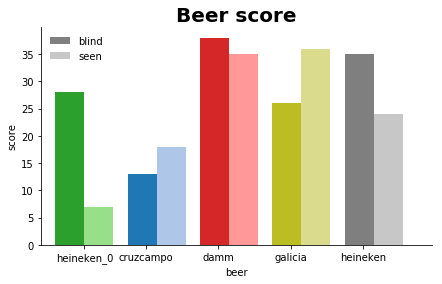

Objective Difference between beers p_val = 0.009
Subjective Difference between beers p_val = 0.0


,beer,counts_b,counts_s
4,cruzcampo,13,18
1,damm,38,35
3,galicia,26,36
2,heineken,35,24
0,heineken_0,28,7


In [158]:
############
############## rank of beers by number of winning situations
############
order_list = [ 'heineken_0', 'cruzcampo',  'damm',  'galicia', 'heineken' ]


blind_win=[]
seen_win=[]

for i in range(0, len(df)):
    ### blind
    res = df['blind'].iloc[i]
    if res == 0:
        blind_win.append(  df['beer1'].iloc[i]  )
    elif res==1:
        blind_win.append(  df['beer2'].iloc[i]  )
    
    ### seen
    res_s = df['seen'].iloc[i]
    if res_s == 0:
        seen_win.append(  df['beer1'].iloc[i]  )
    elif res_s ==1:
        seen_win.append(  df['beer2'].iloc[i]  )
    else:
        seen_win.append(np.nan)
    



df['blind_win'] = blind_win
df['seen_win'] = seen_win 


beers=[]
counts_b=[]
counts_s=[]
for beer in df['blind_win'].unique():
    beers.append(beer)
    counts_b.append( df.loc[df.blind_win == beer, 'blind_win'].count())
    counts_s.append( df.loc[df.seen_win == beer, 'seen_win'].count())


##   
df_b = pd.DataFrame({ 'beer':beers, 'counts': counts_b}) 
df_b['condition'] = 'blind'
#
df_s = pd.DataFrame({ 'beer':beers, 'counts': counts_s}) 
df_s['condition'] = 'seen'

df_bs = pd.DataFrame({ 'beer':beers, 'counts_b': counts_b, 'counts_s': counts_s}) 

# df_b_s = pd.concat([df_b, df_s])
# sns.factorplot(x='beer', y='counts', hue='condition', kind='bar', hue_order = ['blind', 'seen'], order=order_list, data=df_b_s)
# plt.title('Beer score')
# plt.show(block=False)

#####

width=0.4

df_b['indx_plot']=df_b['beer'].copy()
df_b['indx_plot'] = df_b['indx_plot'].replace(order_list, [0, 1, 2, 3, 4])

df_s['indx_plot']=df_s['beer'].copy()
df_s['indx_plot'] = df_s['indx_plot'].replace(order_list, [0 + width, 1 + width, 2+ width, 3+ width, 4+ width])


Colors = ['#1f77b4', '#aec7e8', '#d62728', '#ff9896', '#bcbd22', '#dbdb8d', '#7f7f7f', '#c7c7c7', '#2ca02c', '#98df8a']

df_merge=pd.concat([df_b, df_s])
df_merge = df_merge.sort_values('beer')

fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
plt.bar(df_merge['indx_plot'],df_merge['counts'], color=Colors , width=width)
plt.xticks( [width/2, 1.25-width/2, 2.25-width/2, 3.25-width/2, 4.25-width/2], order_list)
ax.set_title('Beer score', fontsize=20, weight='demibold')
#plt.title('Beer score')
plt.xlabel('beer')
plt.ylabel('score')
plt.xlim(-width, 5)
#plt.ylim(0, 80)
plt.bar(10,1, color='#7f7f7f', label='blind')
plt.bar(10,1, color= '#c7c7c7', label='seen')
plt.legend(frameon=False)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



## Calculate all together with a Chi Square
## If they are all the same, they should win 20% of the times each.

f_obs = list(df_bs.counts_b)
f_exp = [0.2*len(df) for i in range(0,5)]

p_val = chisquare(f_obs, f_exp)[1]
print( 'Objective Difference between beers p_val = ' + str(round(p_val, 3)))

f_obs = list(df_bs.counts_s)
f_exp = [0.2*len(df) for i in range(0,5)]

p_val = chisquare(f_obs, f_exp)[1]
print( 'Subjective Difference between beers p_val = ' + str(round(p_val, 3)))

df_bs.sort_values('beer')

NameError: name 'variable' is not defined

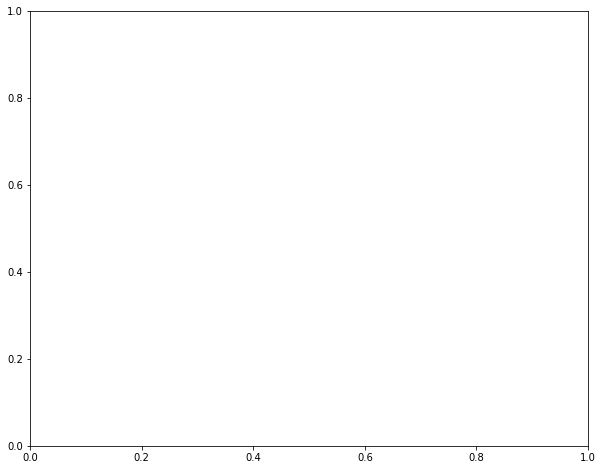

In [159]:
fig, ax = pyplot.subplots(figsize=(10,8))
sns.boxplot(ax=ax, x="group", y=variable, data=df, order=["WT", "HD", "HDT"])
sns.swarmplot(ax=ax, x="group", y=variable, data=df, order=["WT", "HD", "HDT"], color=".25", size=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
pyplot.title(variable + ' boxplot', size=20);

### 2. 1 Is a beer objectively better or worse than chance?

In [160]:
### Binomial test!

##Option 1
## Is Heineken better than the others?
## I have 5 beers. If all are equally good, they should win 20% of the times each. By chance --> p=0.20
## 30 people --> 300 tests 
#print(stats.binom_test(58, n=300, p=0.20, alternative='two-sided'))

##Option 2
## Is Heineken better than the others?
## I have 5 beers. Heineken participated in 4*N = 4*30 subj = 120 tests 1vs 1.
## If heinezen is better, p>0.5 --> p=0.5
#print(stats.binom_test(58, n=120, p=0.5, alternative='two-sided'))

####

for beer in df_bs.beer.unique():
    p_val = stats.binom_test( df_bs.loc[df_bs['beer']==beer, 'counts_b']  , n=len(df), p=0.20, alternative='two-sided')
    print( beer + ', blind p_val = ' + str(round(p_val, 3)))

#
print('')
print('')
print( 'Cruzcampo is objectively worse than the others, Damm is objectively better')


heineken_0, blind p_val = 1.0
damm, blind p_val = 0.044
heineken, blind p_val = 0.14
galicia, blind p_val = 0.752
cruzcampo, blind p_val = 0.001


Cruzcampo is objectively worse than the others, Damm is objectively better


### 2.2 Is a beer subjectively better or worse than chance?

In [161]:
####

for beer in df_bs.beer.unique():
    p_val = stats.binom_test( df_bs.loc[df_bs['beer']==beer, 'counts_s']  , n=len(df), p=0.20, alternative='two-sided')
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))


    
print('')
print('')
print( 'Heineken 0 and Cruzcampo are subjectively worse than the others')


heineken_0, seen p_val = 0.0
damm, seen p_val = 0.14
heineken, seen p_val = 0.46
galicia, seen p_val = 0.092
cruzcampo, seen p_val = 0.034


Heineken 0 and Cruzcampo are subjectively worse than the others


## 3. Is a beer socially over or under rated?
### #Social overrating and underrating 
##### (+ is social overrating and - social underrating, 0 means social rating reflects reality)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


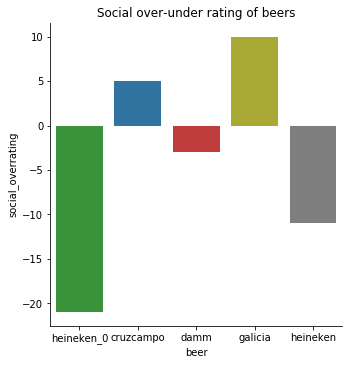

,beer,counts_b,counts_s,social_overrating
4,cruzcampo,13,18,5
1,damm,38,35,-3
3,galicia,26,36,10
2,heineken,35,24,-11
0,heineken_0,28,7,-21


In [162]:
#####
df_bs['social_overrating'] = df_bs['counts_s'] - df_bs['counts_b']

Colors = ['#2ca02c', '#1f77b4',  '#d62728',  '#bcbd22',  '#7f7f7f' ]
sns.factorplot(x='beer', y='social_overrating', order=order_list, kind='bar', data=df_bs, palette=Colors)
plt.title('Social over-under rating of beers') ## if +, the beer is socaily overrated. If -, it is socially underrated
plt.show(block=False)

df_bs.sort_values('beer')

In [163]:
### It is the way to compare with itself
#### Blind / N is the expected p
#### Seen is the expected 

for beer in df_bs.beer.unique():
    p_blind = df_bs.loc[df_bs['beer']==beer, 'counts_b']/len(df)
    p_blind = p_blind.values[0]
    f_seen = df_bs.loc[df_bs['beer']==beer, 'counts_s'].values[0]   
    p_val = stats.binom_test( f_seen , n=len(df), p= p_blind, alternative='two-sided')
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))
    
##
print('')
print('')
print( 'Heineken and Heineken 0 are under rated')
print( 'Estrella Galicia is over rated')

heineken_0, seen p_val = 0.0
damm, seen p_val = 0.635
heineken, seen p_val = 0.032
galicia, seen p_val = 0.038
cruzcampo, seen p_val = 0.145


Heineken and Heineken 0 are under rated
Estrella Galicia is over rated


### Are we socially biased by brands?

In [164]:
## Calculate all together with a Chi Square
f_obs = list(df_bs.counts_s)
f_exp = list(df_bs.counts_b)

p_val = chisquare(f_obs, f_exp)[1]
print( 'Group brand bias p_val = ' + str(round(p_val, 8)))

Group brand bias p_val = 4.558e-05


### Personal taste

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


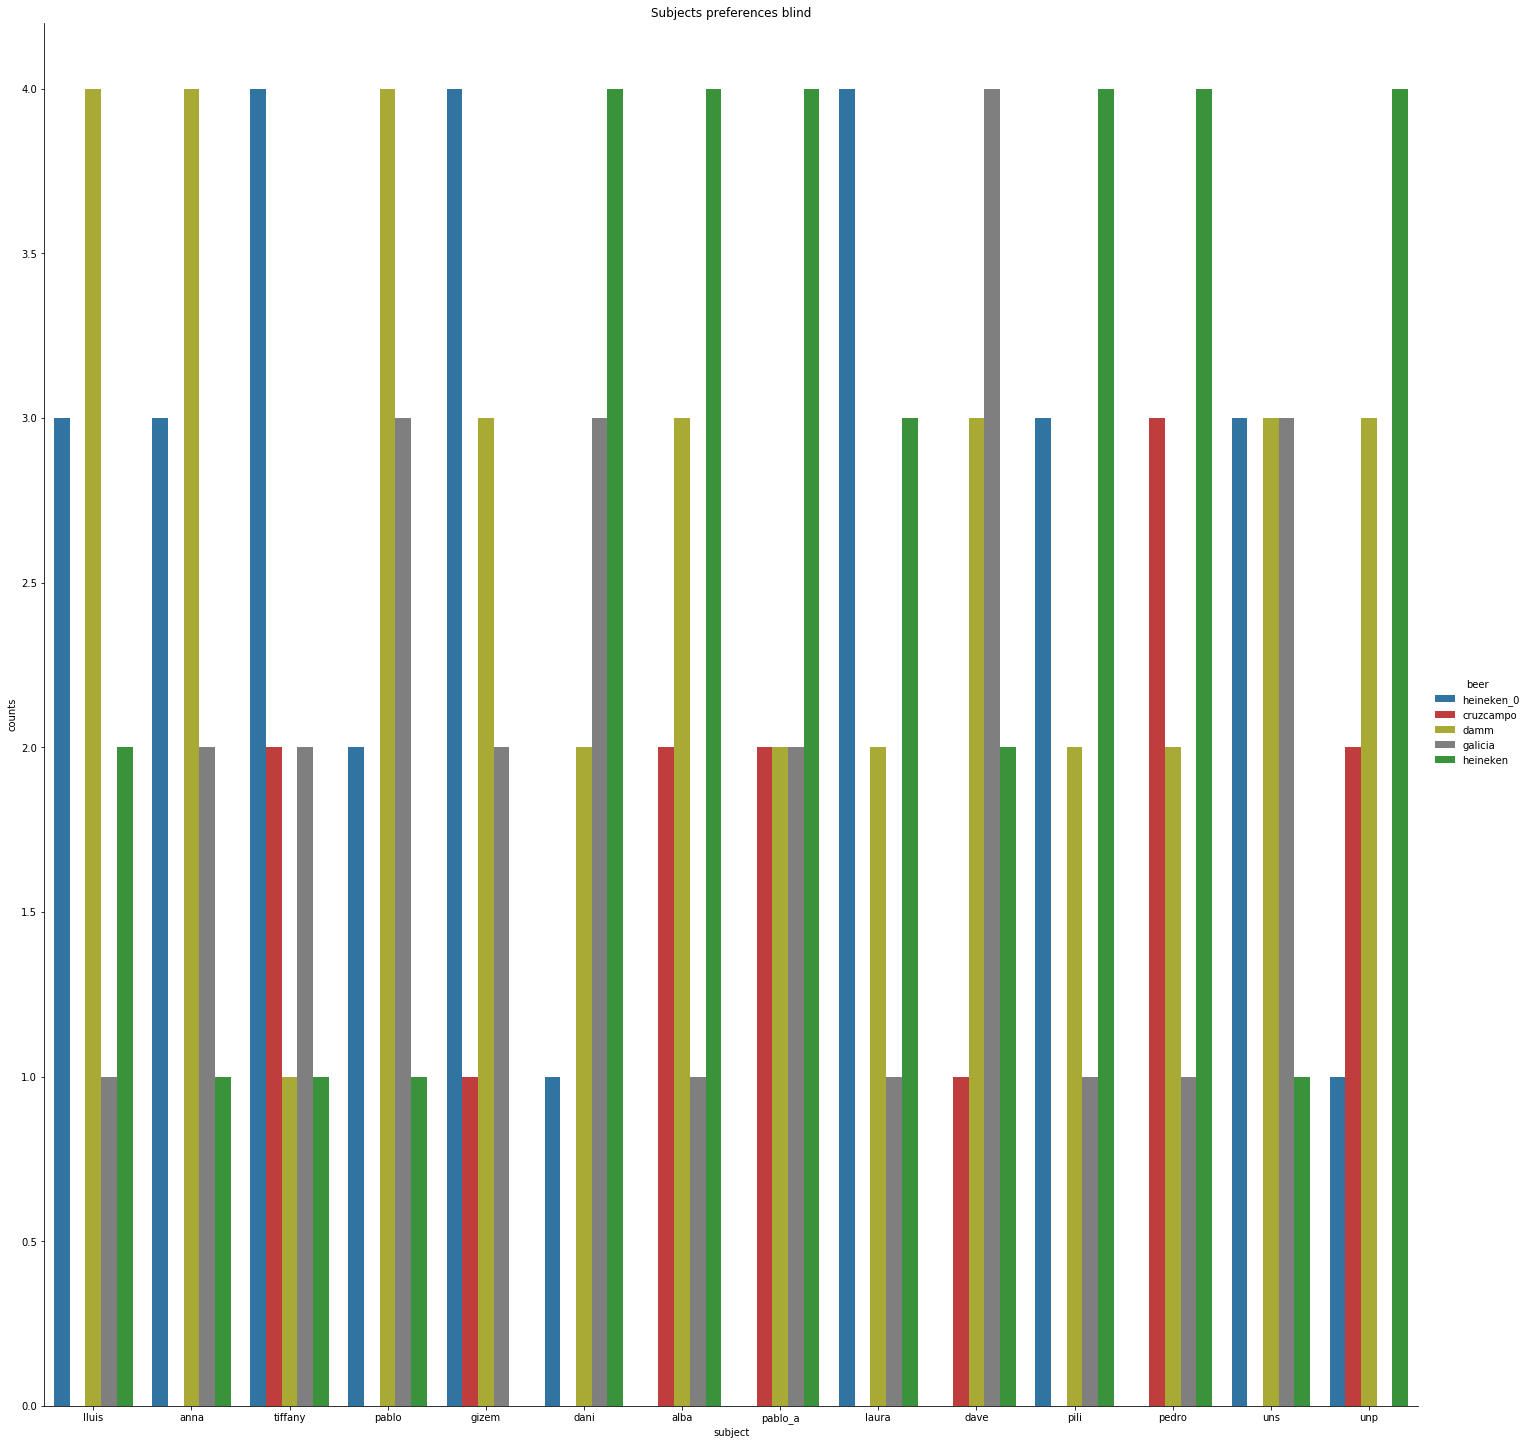

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


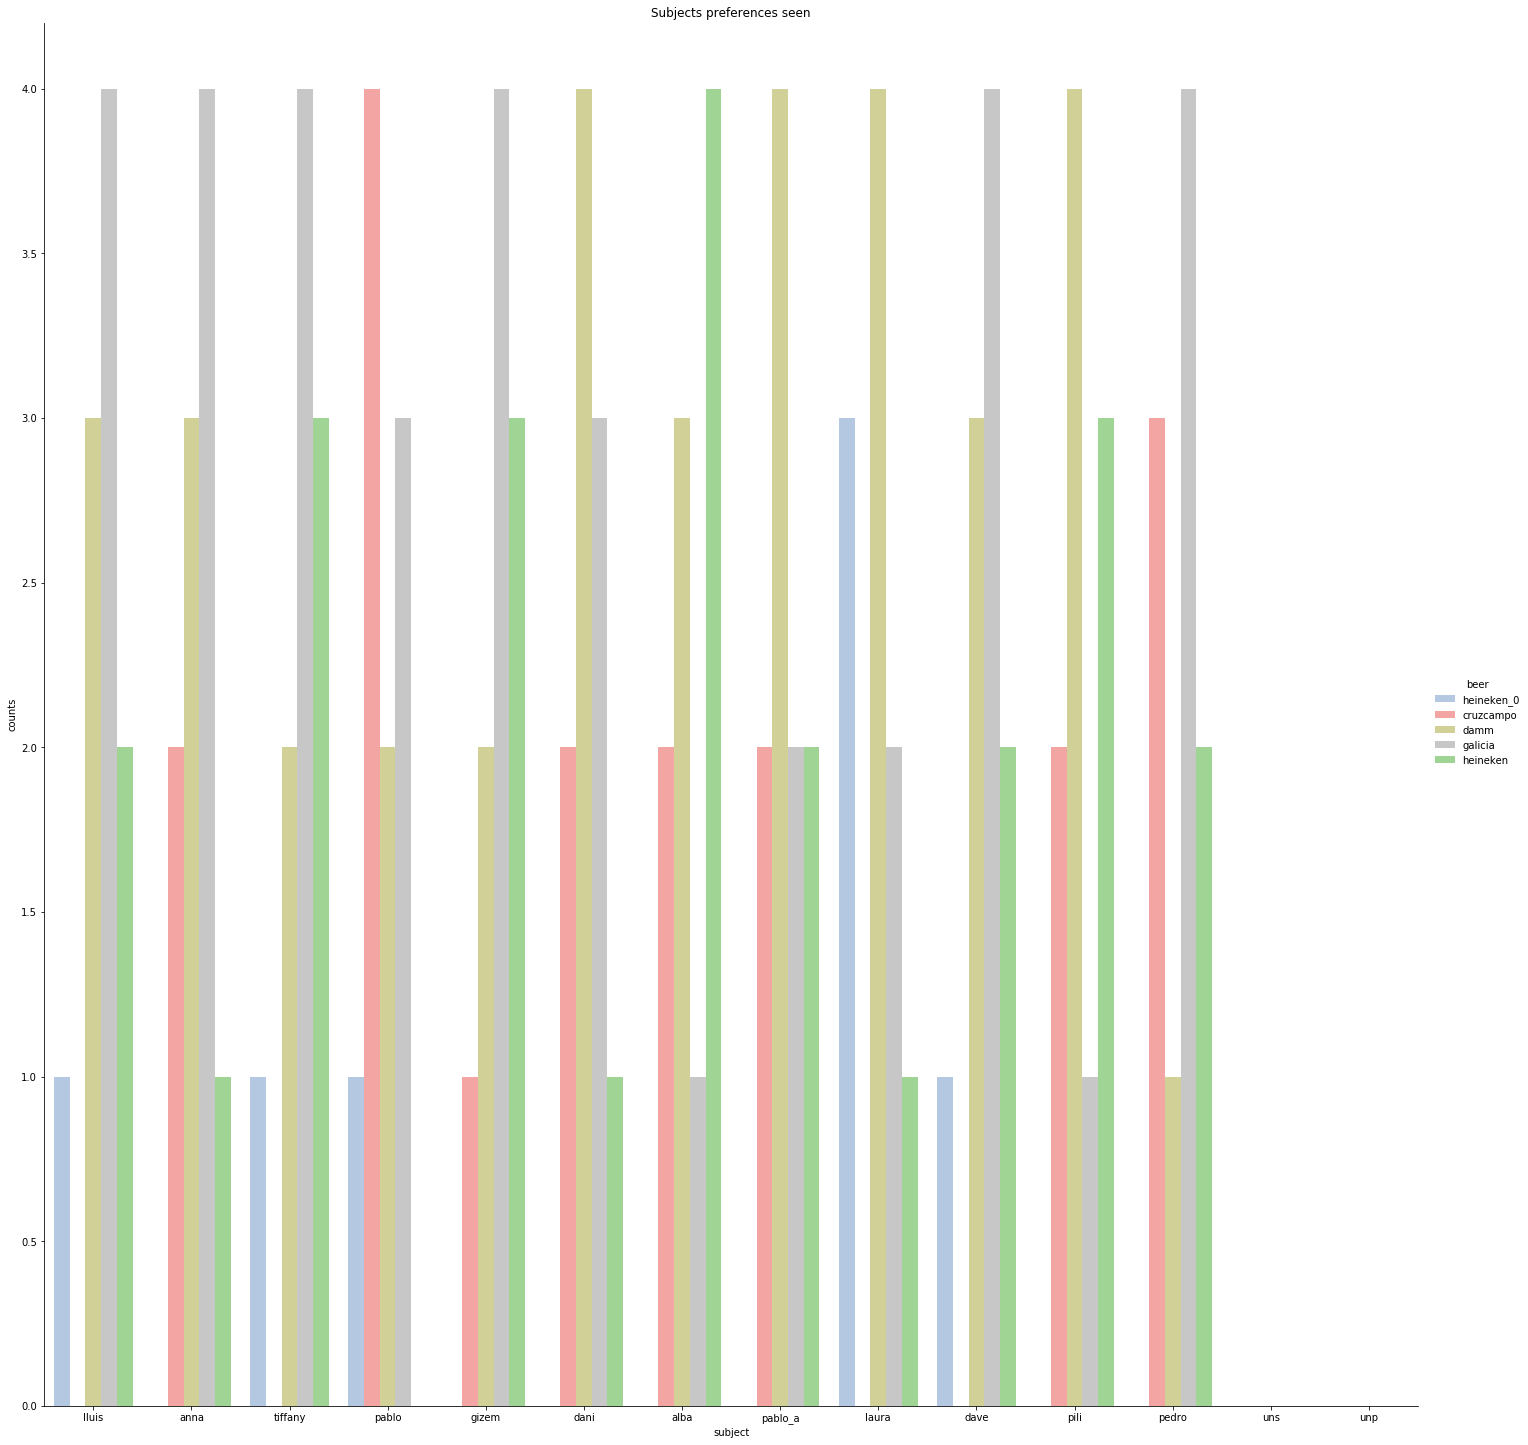

In [107]:

beers=[]
counts_b=[]
counts_s=[]
subj = []

for s in df.subj.unique():
    for beer in order_list:
        c_b = len(df.loc[(df['subj']==s) & (df['blind_win']==beer)])
        c_s = len(df.loc[(df['subj']==s) & (df['seen_win']==beer)])
        
        beers.append(beer)
        counts_b.append(c_b)
        counts_s.append(c_s)
        subj.append(s)


df_personal_taste = pd.DataFrame({'subj': subj, 'beer': beers, 'blind': counts_b, 'seen': counts_s})
df_personal_taste

Colors_b = ['#1f77b4', '#d62728', '#bcbd22', '#7f7f7f', '#2ca02c']
Colors_s = ['#aec7e8', '#ff9896', '#dbdb8d','#c7c7c7', '#98df8a']

sns.factorplot(x='subj', y='blind', hue='beer', hue_order=order_list, data=df_personal_taste,
               kind='bar', palette= Colors_b, size=20)

plt.xlabel('subject')
plt.ylabel('counts')
plt.title('Subjects preferences blind')
plt.show(block=False)


sns.factorplot(x='subj', y='seen', hue='beer', hue_order=order_list, data=df_personal_taste,
               kind='bar', palette= Colors_s, size=20)

plt.xlabel('subject')
plt.ylabel('counts')
plt.title('Subjects preferences seen')
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


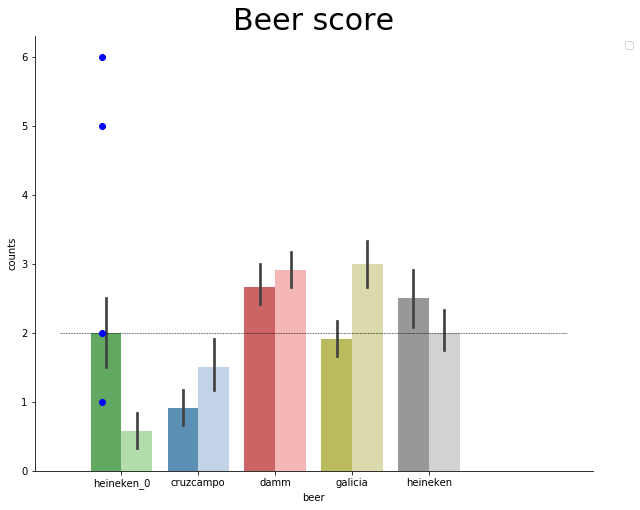

In [242]:
##plot beer score
palettes = [['#2ca02c', '#98df8a' ], ['#1f77b4', '#aec7e8'], [ '#d62728', '#ff9896'],  ['#bcbd22', '#dbdb8d'], ['#7f7f7f', '#c7c7c7' ]]

fig, ax = pyplot.subplots(figsize=(10,8))

for idx, beer in enumerate(order_list):
    #mean
    sns.catplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']==beer], kind='bar',
                   ci=68, palette= palettes[idx], order=order_list, hue_order=['blind', 'seen'],  alpha=0.8)
    plt.close()
    
#     # subj
#     sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']==beer],
#                    palette= palettes[idx], order=order_list, hue_order=['blind', 'seen'], size=4)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[10:], labels[10:], bbox_to_anchor=(1.05, 1), loc=2)
plt.plot([-0.8, 5.8], [2, 2], 'k--', linewidth=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title('Beer score', size=30);
plt.plot([-0.25,-.25,-.25,-.25],[1,2,5,6],'bo')


<BarContainer object of 10 artists>

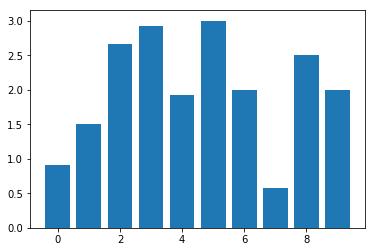

In [236]:
df=pd.DataFrame({"counts": df_count_subj.counts.values, "beer": df_count_subj.beer.values+df_count_subj.cond.values})
y=df.groupby("beer").mean().values
plt.bar(range(10),y[:,0])
